In [18]:
import pandas as pd
import numpy as np
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import sklearn.cluster as cluster

In [77]:
df=pd.read_csv('5factors without date.csv')
df

,Temperature_Max,Temperature_Mean,Temperature_Min,DewPoint_Max,DewPoint_Mean,DewPoint_Min,Humidity_Max,Humidity_Mean,Humidity_Min,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,Pressure_Max,Pressure_Mean,Pressure_Min,COVIDCASES
0,35,30,27,72,64,52,66,48,30,20,12,3,30,30,30,398
1,31,28,26,68,62,57,62,49,38,18,10,3,30,30,30,412
2,29,25,22,73,66,59,89,69,45,23,10,3,30,30,30,432
3,29,25,22,70,67,64,88,73,54,12,7,0,30,30,30,460
4,28,25,23,68,66,63,78,69,51,14,8,3,30,30,30,477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,44,37,32,81,68,46,56,40,12,21,10,2,30,30,29,2223
439,43,37,31,75,62,43,59,33,11,16,8,2,30,30,29,2282
440,43,38,34,68,60,52,37,26,17,16,9,1,30,30,30,2122
441,41,37,34,75,69,59,56,39,26,16,10,3,30,30,30,2040


In [78]:
df.columns

Index(['Temperature_Max', 'Temperature_Mean', 'Temperature_Min',
       'DewPoint_Max', 'DewPoint_Mean', 'DewPoint_Min', 'Humidity_Max',
       'Humidity_Mean', 'Humidity_Min', 'WindSpeed_Max', 'WindSpeed_Mean',
       'WindSpeed_Min', 'Pressure_Max', 'Pressure_Mean', 'Pressure_Min',
       'COVIDCASES'],
      dtype='object')

In [80]:
df.index

RangeIndex(start=0, stop=443, step=1)

In [81]:
type(df)

pandas.core.frame.DataFrame

In [82]:
df.shape

(443, 16)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Temperature_Max   443 non-null    int64
 1   Temperature_Mean  443 non-null    int64
 2   Temperature_Min   443 non-null    int64
 3   DewPoint_Max      443 non-null    int64
 4   DewPoint_Mean     443 non-null    int64
 5   DewPoint_Min      443 non-null    int64
 6   Humidity_Max      443 non-null    int64
 7   Humidity_Mean     443 non-null    int64
 8   Humidity_Min      443 non-null    int64
 9   WindSpeed_Max     443 non-null    int64
 10  WindSpeed_Mean    443 non-null    int64
 11  WindSpeed_Min     443 non-null    int64
 12  Pressure_Max      443 non-null    int64
 13  Pressure_Mean     443 non-null    int64
 14  Pressure_Min      443 non-null    int64
 15  COVIDCASES        443 non-null    int64
dtypes: int64(16)
memory usage: 55.5 KB


In [84]:
df.describe()

,Temperature_Max,Temperature_Mean,Temperature_Min,DewPoint_Max,DewPoint_Mean,DewPoint_Min,Humidity_Max,Humidity_Mean,Humidity_Min,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,Pressure_Max,Pressure_Mean,Pressure_Min,COVIDCASES
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,35.309255,30.381490,26.042889,70.577878,63.548533,52.810384,68.677201,49.857788,27.970655,15.424379,7.920993,2.494357,29.893905,29.839729,29.643341,1415.433409
std,6.406415,5.850035,5.934824,9.810197,10.297575,12.984856,14.479103,13.304818,12.683461,3.067202,1.745216,1.494133,0.308307,0.367272,2.041231,938.250344
min,22.000000,18.000000,13.000000,41.000000,31.000000,0.000000,29.000000,17.000000,0.000000,8.000000,5.000000,0.000000,29.000000,29.000000,0.000000,0.000000
25%,30.000000,25.000000,22.000000,64.000000,56.000000,45.000000,58.000000,41.000000,17.000000,14.000000,7.000000,2.000000,30.000000,30.000000,30.000000,569.500000
50%,37.000000,32.000000,27.000000,72.000000,63.000000,54.000000,69.000000,50.000000,28.000000,15.000000,8.000000,2.000000,30.000000,30.000000,30.000000,1234.000000
75%,41.000000,35.000000,31.000000,79.000000,72.000000,63.000000,79.000000,60.000000,37.000000,17.000000,9.000000,3.000000,30.000000,30.000000,30.000000,2001.500000
max,47.000000,41.000000,37.000000,88.000000,84.000000,82.000000,100.000000,83.000000,62.000000,32.000000,15.000000,8.000000,30.000000,30.000000,30.000000,3977.000000


In [85]:
df.corr()

,Temperature_Max,Temperature_Mean,Temperature_Min,DewPoint_Max,DewPoint_Mean,DewPoint_Min,Humidity_Max,Humidity_Mean,Humidity_Min,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,Pressure_Max,Pressure_Mean,Pressure_Min,COVIDCASES
Temperature_Max,1.000000,0.970635,0.917815,0.764927,0.566750,0.228321,-0.238948,-0.402674,-0.523960,0.357258,0.289129,0.037882,-0.345315,-0.412549,-0.109020,-0.600332
Temperature_Mean,0.970635,1.000000,0.975432,0.792046,0.624274,0.341474,-0.268289,-0.385553,-0.404443,0.355102,0.362394,0.099771,-0.377662,-0.450597,-0.099985,-0.663716
Temperature_Min,0.917815,0.975432,1.000000,0.806481,0.679003,0.457833,-0.244037,-0.308595,-0.269827,0.363036,0.419066,0.160128,-0.406782,-0.477417,-0.055135,-0.680467
DewPoint_Max,0.764927,0.792046,0.806481,1.000000,0.916110,0.592723,0.314299,0.200645,-0.026992,0.182888,0.239741,0.136361,-0.427751,-0.512374,-0.168082,-0.560195
DewPoint_Mean,0.566750,0.624274,0.679003,0.916110,1.000000,0.812509,0.446230,0.460103,0.282685,0.124557,0.260493,0.224962,-0.438419,-0.544405,-0.176233,-0.527399
DewPoint_Min,0.228321,0.341474,0.457833,0.592723,0.812509,1.000000,0.343549,0.520218,0.655155,0.065023,0.302143,0.310721,-0.370683,-0.463717,-0.010666,-0.383419
Humidity_Max,-0.238948,-0.268289,-0.244037,0.314299,0.446230,0.343549,1.000000,0.886127,0.467873,-0.249234,-0.223324,0.025799,-0.072562,-0.088459,-0.068665,0.159056
Humidity_Mean,-0.402674,-0.385553,-0.308595,0.200645,0.460103,0.520218,0.886127,1.000000,0.747388,-0.277660,-0.163788,0.104380,-0.080904,-0.107924,-0.079180,0.167677
Humidity_Min,-0.523960,-0.404443,-0.269827,-0.026992,0.282685,0.655155,0.467873,0.747388,1.000000,-0.211427,0.049773,0.241090,-0.062705,-0.117576,-0.002415,0.132796
WindSpeed_Max,0.357258,0.355102,0.363036,0.182888,0.124557,0.065023,-0.249234,-0.277660,-0.211427,1.000000,0.617014,0.112589,-0.028840,-0.076056,0.007246,-0.242923


<AxesSubplot:>

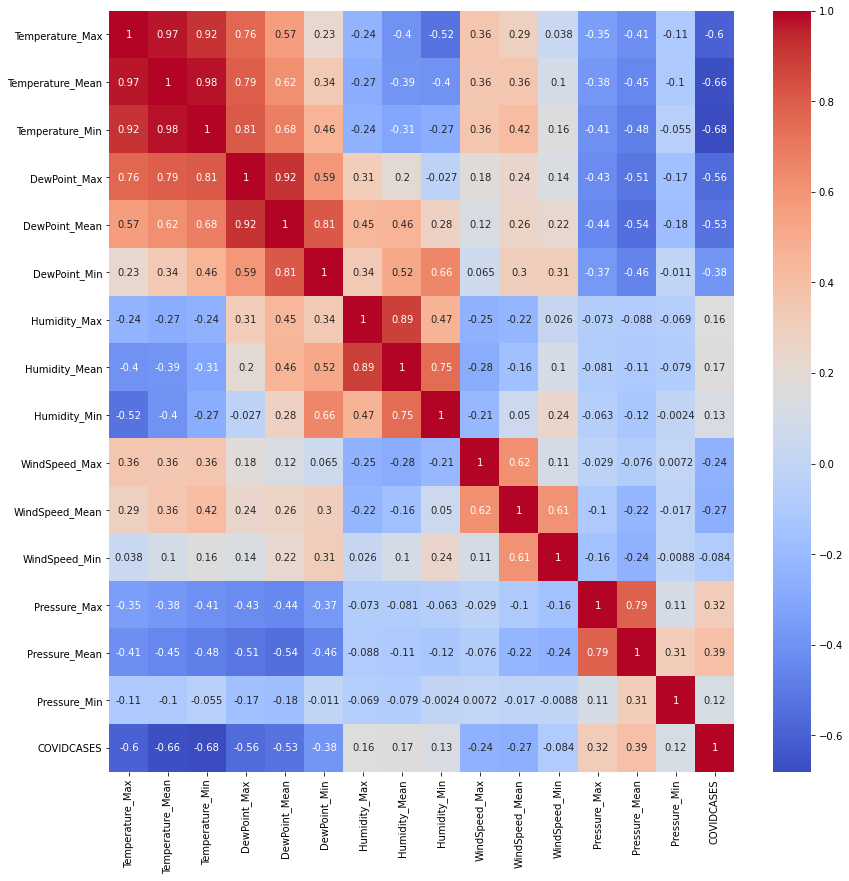

In [86]:
plt.figure(figsize=(14,14))
seaborn.heatmap(df.corr(), annot=True, cmap='coolwarm')

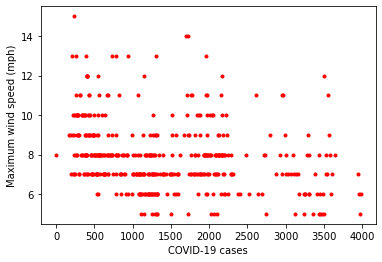

In [87]:
plt.xlabel('COVID-19 cases')
plt.ylabel ('Maximum wind speed (mph)')
plt.scatter(df.COVIDCASES, df.WindSpeed_Mean, color='red', marker= '.')

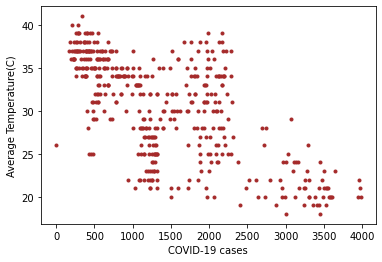

In [88]:
plt.xlabel('COVID-19 cases')
plt.ylabel('Average Temperature(C)')
plt.scatter (df.COVIDCASES, df.Temperature_Mean, color='brown', marker='.')

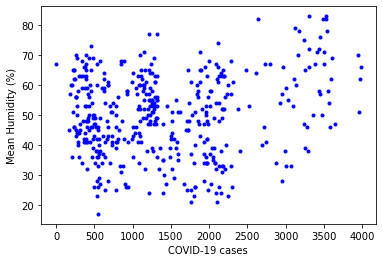

In [90]:
plt.xlabel('COVID-19 cases')
plt.ylabel('Mean Humidity (%)')
plt.scatter(df.COVIDCASES, df.Humidity_Mean, color='blue', marker='.')

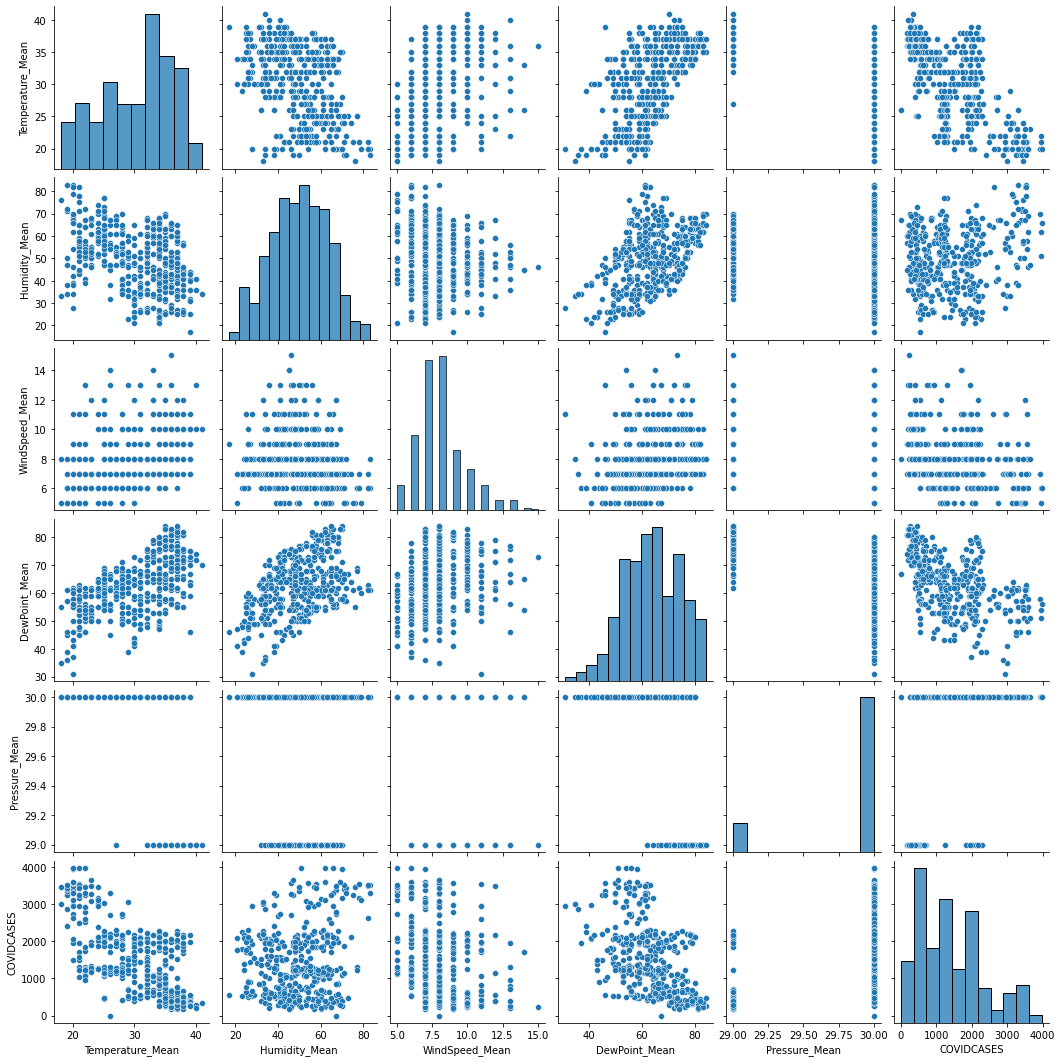

In [91]:
sns.pairplot(df[['Temperature_Mean','Humidity_Mean','WindSpeed_Mean','DewPoint_Mean','Pressure_Mean','COVIDCASES']])

In [92]:
import sklearn.cluster as cluster

In [93]:
#2k clusters based on Mean Temperature and Mean Humidity

kmeans=cluster.KMeans (n_clusters=2, init="k-means++")
kmeans= kmeans.fit(df[['Temperature_Mean','Humidity_Mean','COVIDCASES']])

In [94]:
kmeans.cluster_centers_

array([[  27.3597561 ,   50.90243902, 2442.23170732],
       [  32.15770609,   49.2437276 ,  811.86738351]])

In [95]:
df['Clusters']=kmeans.labels_

In [96]:
df.head()

,Temperature_Max,Temperature_Mean,Temperature_Min,DewPoint_Max,DewPoint_Mean,DewPoint_Min,Humidity_Max,Humidity_Mean,Humidity_Min,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,Pressure_Max,Pressure_Mean,Pressure_Min,COVIDCASES,Clusters
0,35,30,27,72,64,52,66,48,30,20,12,3,30,30,30,398,1
1,31,28,26,68,62,57,62,49,38,18,10,3,30,30,30,412,1
2,29,25,22,73,66,59,89,69,45,23,10,3,30,30,30,432,1
3,29,25,22,70,67,64,88,73,54,12,7,0,30,30,30,460,1
4,28,25,23,68,66,63,78,69,51,14,8,3,30,30,30,477,1


In [97]:
df['Clusters'].value_counts()

1    279
0    164
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Temperature_Mean', ylabel='COVIDCASES'>

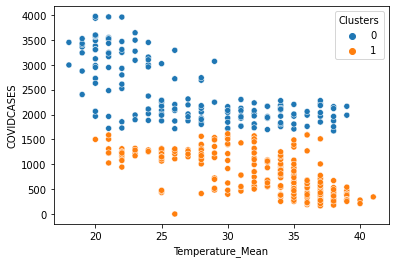

In [98]:
sns.scatterplot(x='Temperature_Mean',y='COVIDCASES',
               hue='Clusters', data=df)

<AxesSubplot:xlabel='Humidity_Mean', ylabel='COVIDCASES'>

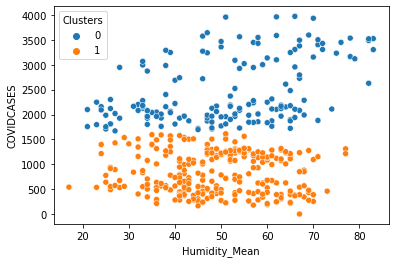

In [99]:
sns.scatterplot(x='Humidity_Mean',y='COVIDCASES', hue='Clusters', data=df)